## Deep Learning Models Comparison for ENSO Forecasting
##### Multivariate Multistep Forecasting

What is ENSO? and other details are in this notebook: [Forecasting El Nino-Southern Oscillation (ENSO)](https://www.kaggle.com/code/shabanamir/forecasting-el-nino-southern-oscillation-enso)

### Data
Training, Validation & Testing: [El Nino-Southern Oscillation (ENSO) Data](https://www.kaggle.com/datasets/shabanamir/enso-data)

### Forecasting Type
Mutivariate Multistep Time Series Forecasting

### Models
- MLP (Multi Layer Perceptron)
- CNN (Convolutional Neural Network)
- RNN (Recurrent Neural Network)
- LSTM (Long Short-Term Memory)
- CNN-LSTM

### Evaluation Metrics
- MAE (Mean Absolute Error)
- MAPE (Mean Absolute Percentage Error)
- RMSE (Root Mean Square Error)
- R sqaured

In [1]:
import matplotlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, TimeDistributed
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow_addons.metrics import RSquare

### Data Understanding

In [2]:
# load data
df_enso = pd.read_csv('/kaggle/input/enso-data/ENSO.csv', parse_dates=[0])
df_enso.head()

,Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1,1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
2,1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
3,1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
4,1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [3]:
df_enso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          882 non-null    datetime64[ns]
 1   Year                          882 non-null    int64         
 2   Month                         882 non-null    object        
 3   Global Temperature Anomalies  882 non-null    float64       
 4   Nino 1+2 SST                  498 non-null    float64       
 5   Nino 1+2 SST Anomalies        498 non-null    float64       
 6   Nino 3 SST                    498 non-null    float64       
 7   Nino 3 SST Anomalies          498 non-null    float64       
 8   Nino 3.4 SST                  498 non-null    float64       
 9   Nino 3.4 SST Anomalies        498 non-null    float64       
 10  Nino 4 SST                    498 non-null    float64       
 11  Nino 4 SST Anomalies          49

In [4]:
# missing values
df_enso.isna().sum(axis=0)

Date                              0
Year                              0
Month                             0
Global Temperature Anomalies      0
Nino 1+2 SST                    384
Nino 1+2 SST Anomalies          384
Nino 3 SST                      384
Nino 3 SST Anomalies            384
Nino 3.4 SST                    384
Nino 3.4 SST Anomalies          384
Nino 4 SST                      384
Nino 4 SST Anomalies            384
TNI                               7
PNA                               0
OLR                             308
SOI                              12
Season (2-Month)                  0
MEI.v2                          348
Season (3-Month)                  0
ONI                               0
Season (12-Month)                 0
ENSO Phase-Intensity              6
dtype: int64

In [5]:
df_enso.describe()

,Year,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,Nino 4 SST Anomalies,TNI,PNA,OLR,SOI,MEI.v2,ONI
count,882.000000,882.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,875.000000,882.000000,574.0000,870.000000,534.000000,882.000000
mean,1986.251701,0.337971,23.250542,-0.049859,25.967731,-0.065743,27.016325,-0.079859,28.451727,-0.100904,-0.418517,-0.109002,0.0500,0.154138,-0.067228,-0.003175
std,21.230643,0.345478,2.328832,1.046806,1.233975,0.853805,0.945222,0.829843,0.679232,0.634455,1.361371,1.034818,0.9789,0.940521,0.987631,0.832301
min,1950.000000,-0.370000,19.060000,-1.900000,23.380000,-2.160000,24.560000,-2.220000,26.360000,-1.870000,-3.376000,-3.650000,-2.8000,-3.600000,-2.500000,-2.000000
25%,1968.000000,0.060000,21.220000,-0.740000,24.985000,-0.650000,26.340000,-0.670000,28.000000,-0.570000,-1.458500,-0.787500,-0.6000,-0.400000,-0.800000,-0.600000
50%,1986.000000,0.300000,23.140000,-0.240000,25.935000,-0.170000,27.060000,-0.110000,28.560000,-0.020000,-0.497000,-0.080000,0.1000,0.200000,-0.100000,-0.100000
75%,2005.000000,0.610000,25.230000,0.440000,26.902500,0.417500,27.690000,0.440000,28.977500,0.370000,0.384500,0.600000,0.7000,0.800000,0.500000,0.500000
max,2023.000000,1.340000,28.510000,4.030000,28.810000,3.070000,29.540000,2.720000,30.220000,1.550000,4.227000,2.870000,2.3000,2.900000,2.700000,2.600000


In [6]:
# set index
df_enso.set_index('Date', inplace = True)
df_enso.head(5)

,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [7]:
# enso indicators
indicators = [col for col in df_enso.columns if col not in {'Year',
                                                            'Month',
                                                            'Global Temperature Anomalies',
                                                            'Season (2-Month)',
                                                            'Season (3-Month)',
                                                            'Season (12-Month)',
                                                            'ENSO Phase-Intensity'}]
indicators

['Nino 1+2 SST',
 'Nino 1+2 SST Anomalies',
 'Nino 3 SST',
 'Nino 3 SST Anomalies',
 'Nino 3.4 SST',
 'Nino 3.4 SST Anomalies',
 'Nino 4 SST',
 'Nino 4 SST Anomalies',
 'TNI',
 'PNA',
 'OLR',
 'SOI',
 'MEI.v2',
 'ONI']

### Data Visulaization

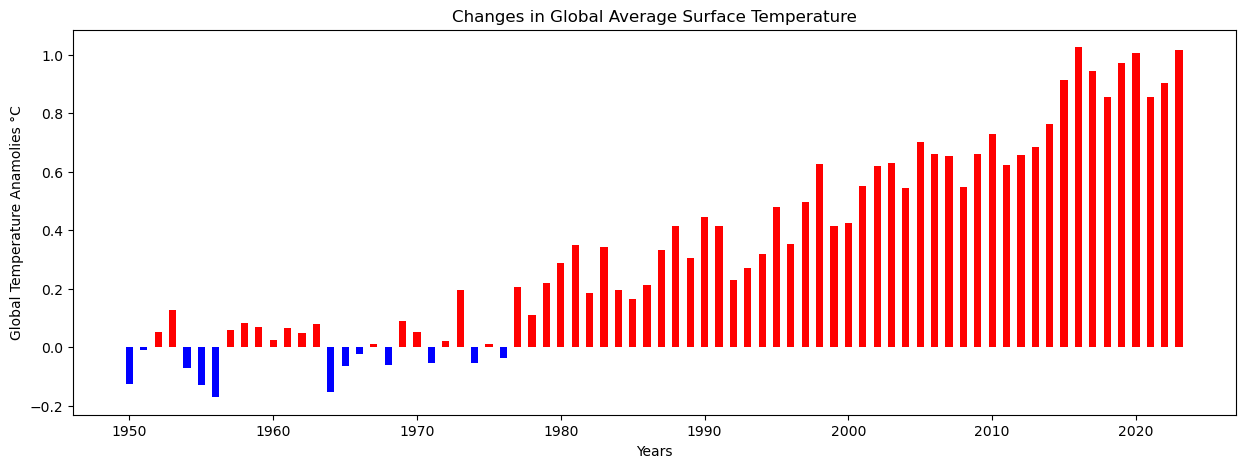

In [8]:
# annual changes (increase/decrease) in global temperture

annual_anamoly = df_enso.groupby('Year')['Global Temperature Anomalies'].mean()
plt.figure(figsize=(15, 5))
plt.bar(x = df_enso.Year.unique(), 
        height = annual_anamoly,
        width = 0.5,
        color = ['r' if val > 0 else 'b' for val in annual_anamoly])
plt.xlabel('Years')
plt.ylabel('Global Temperature Anamolies °C')
plt.title('Changes in Global Average Surface Temperature')
# plt.savefig('global temperature changes.png')
plt.show()

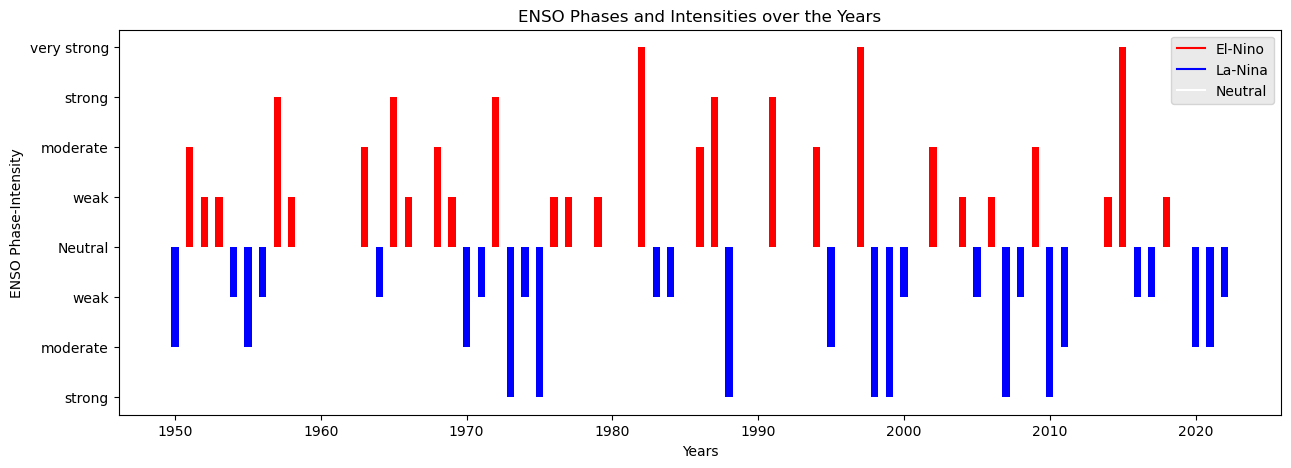

In [9]:
# enso type

# encode enso phases
encoding_enso = {'VSE': 2.0,
                 'SE': 1.5,
                 'ME': 1.0,
                 'WE': 0.5,
                 'N': 0,       # neutral is between -0.4 and +0.4, here we will use 0
                 'WL': -0.5,
                 'ML': -1,
                 'SL': -1.5}
encoded_enso = df_enso['ENSO Phase-Intensity'][::12].map(encoding_enso)

# plot
plt.figure(figsize=(15, 5))
plt.bar(x = df_enso.Year.unique(), 
        height = encoded_enso, 
        width = 0.5,
        color = ['r' if val > 0 else 'b' for val in encoded_enso])
plt.xlabel('Years')
plt.ylabel('ENSO Phase-Intensity')
plt.title('ENSO Phases and Intensities over the Years')

# custom y-axis labels
plt.yticks(ticks = np.arange(-1.5, 2.5, 0.5), 
           labels = ['strong', 'moderate', 'weak', 'Neutral', 
                     'weak', 'moderate', 'strong', 'very strong'])

# custom legends
line_red = matplotlib.lines.Line2D([0], [0], label='El-Nino', color='r')
line_blue = matplotlib.lines.Line2D([0], [0], label='La-Nina', color='b')
line_white = matplotlib.lines.Line2D([0], [0], label='Neutral', color='w')
plt.legend(handles=[line_red, line_blue, line_white], facecolor='#e5e5e5', loc='upper right')

# save and show
# plt.savefig('enso phase intensity.eps', format='eps')
plt.show()

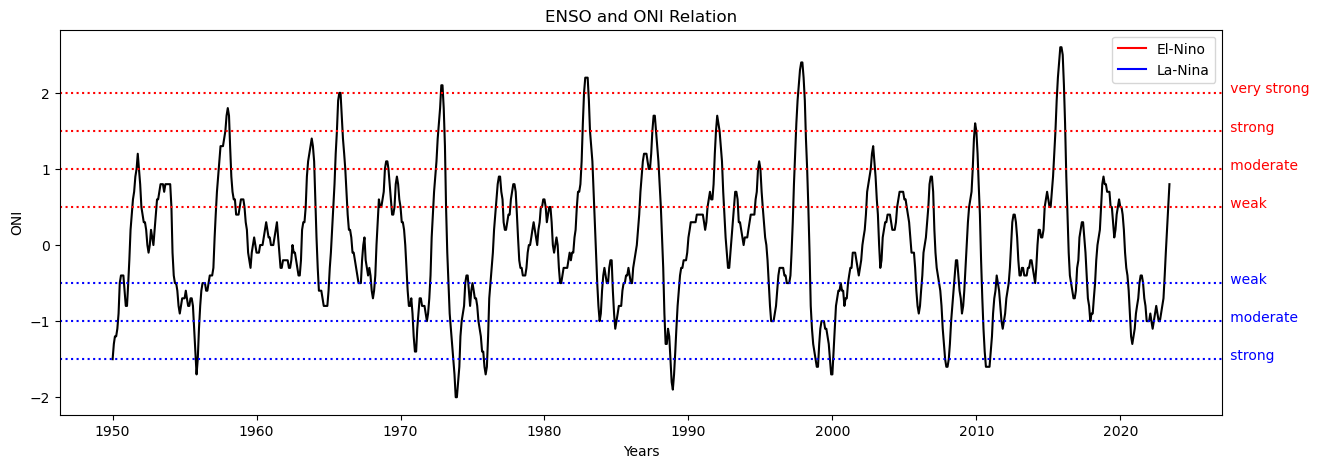

In [10]:
# ONI and ENSO relation

plt.figure(figsize=(15, 5))

# convert dates to numbers to get x-axis range
x = matplotlib.dates.date2num(df_enso.index)

# plot Year and ONI
plt.plot(df_enso.ONI, color='black')
plt.xlabel('Years')
plt.ylabel('ONI')
plt.title('ENSO and ONI Relation')

# add horizontal lines and labels to define ENSO  and intensity

plt.axhline(y=2, color='r', linestyle=':')
plt.text(x=x[-1], y=2, color='red', s='              very strong')

plt.axhline(y=1.5, color='r', linestyle=':')
plt.text(x=x[-1], y=1.5, color='red', s='              strong')

plt.axhline(y=1, color='r', linestyle=':')
plt.text(x[-1], 1, color='r', s='              moderate')

plt.axhline(y=0.5, color='r', linestyle=':')
plt.text(x[-1], 0.5, color='r', s='              weak')

plt.axhline(y=-0.5, color='b', linestyle=':')
plt.text(x[-1], -0.5, color='b', s='              weak')

plt.axhline(y=-1, color='b', linestyle=':')
plt.text(x[-1], -1, color='b', s='              moderate')

plt.axhline(y=-1.5, color='b', linestyle=':')
plt.text(x[-1], -1.5, color='b', s='              strong')

# custom legends
line_red = matplotlib.lines.Line2D([0], [0], label='El-Nino', color='r')
line_blue = matplotlib.lines.Line2D([0], [0], label='La-Nina', color='b')
plt.legend(handles=[line_red, line_blue])

plt.show()

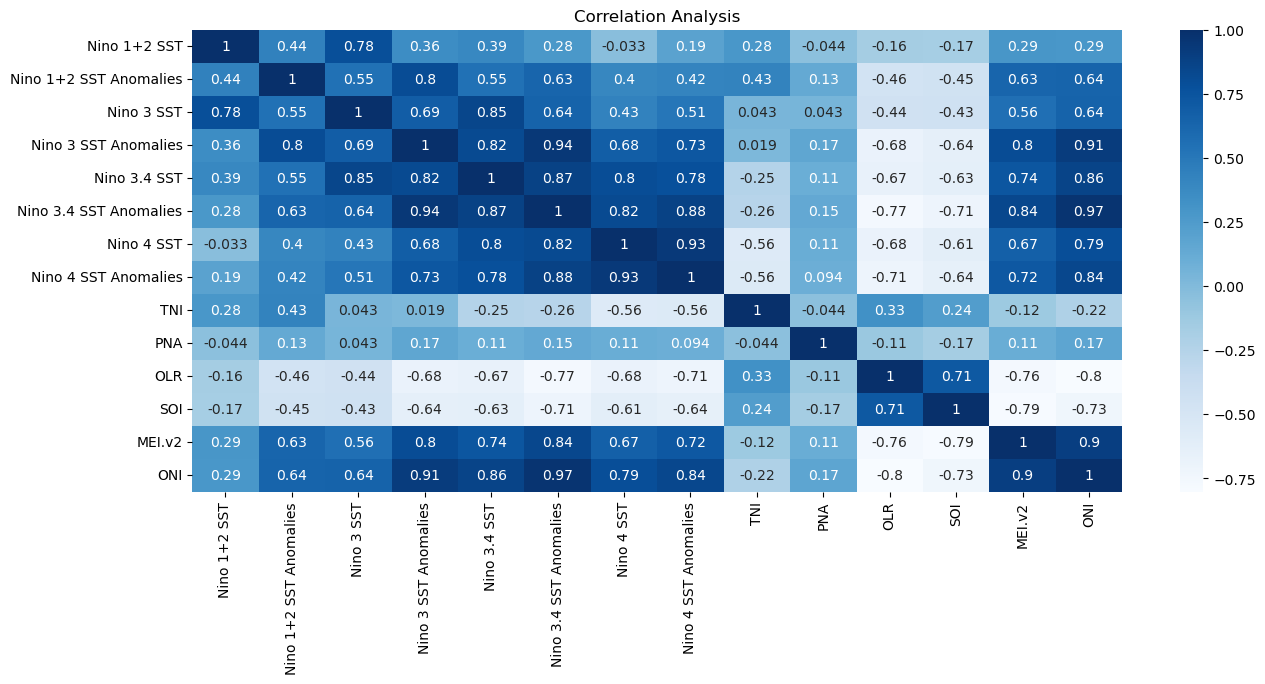

In [11]:
# correlation analysis 
# find correlation of NOI with other variables to get main enso indicators

plt.figure(figsize=(15, 6))
sns.heatmap(df_enso[indicators].corr(), annot=True, cmap='Blues')
plt.title('Correlation Analysis')
plt.show()

### Data Preprocessing

In [12]:
# main enso indicators
indicators = ['Nino 3.4 SST Anomalies', 'OLR', 'SOI', 'MEI.v2', 'ONI']

In [13]:
# missing values in indicator columns
df_enso[indicators].isna().sum(axis=0)

Nino 3.4 SST Anomalies    384
OLR                       308
SOI                        12
MEI.v2                    348
ONI                         0
dtype: int64

In [14]:
# fill missing values in Nino 3.4 SST Anomalies with ONI values
# ONI is the running 3-month mean SST anomaly for the Nino 3.4 region

df_enso['Nino 3.4 SST Anomalies'].fillna(df_enso['ONI'], inplace=True)

In [15]:
# fill missing values in MEI.v2 with ENSO Type encoded values
# positive MEI.v2 indicates El-Nino, negative indicates La-Nina

df_enso['MEI.v2'].fillna(df_enso['ENSO Phase-Intensity'].map(encoding_enso), inplace=True)

In [16]:
# fill missing values in SOI and OLR with ENSO Type encoded values
# negative SOI/OLR indicates El-Nino, positive indicates La-Nina

encoding_enso = {'VSE': -2,
                 'SE': -1.5,
                 'ME': -1.0,
                 'WE': -0.5,
                 'N': 0,
                 'WL': 0.5,
                 'ML': 1,
                 'SL': 1.5}

df_enso['SOI'].fillna(df_enso['ENSO Phase-Intensity'].map(encoding_enso), inplace=True)
df_enso['OLR'].fillna(df_enso['ENSO Phase-Intensity'].map(encoding_enso), inplace=True)

In [17]:
df_enso[indicators].isna().sum(axis=0)

Nino 3.4 SST Anomalies    0
OLR                       0
SOI                       0
MEI.v2                    0
ONI                       0
dtype: int64

In [18]:
# function to transform time series data into supervised learning data
# the transformation is necessary to get input (x) and output (y) sequences
# this function can be used for univariate, multivariate, one-step, and multi-step forecasting

# in one-step, n_in and n_out = 1
# in one-step, n_in and n_out > 1
# in univariate, the number of variables/columns = 1
# in multivariate, the number of variables/columns > 1

# there are two types of multivariate forecasting i.e whether you want to forecast all input variables or one of them
# if you want to predict one of the input variables, make it the last column of the dataframe 


def series_to_supervised(data, n_in=1, n_out=1, n_vars=1, forecast_all=True, 
                         dropnan=True):
    """
    Frame a time series as a supervised learning dataset
    Parameters:
        data: Sequence of observations, type = dataframe
        n_in: prior timesteps or Number of lag observations as input (X)
        n_out: next timesteps or Number of ahead observations as output (y)
        n_vars: number of variables or number of columns
        forecast_all: to forecast all or one variable
        dropnan: Boolean whether or not to drop rows with NaN values
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    cols, names = list(), list()
    
    if n_vars == 1:    # univariate
        # input sequence or previous timesteps (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names.append(f'var1 (t-{i})')
        # current time steps (t)
        cols.append(data)
        names.append('var1 (t)')
        # forecast sequence or next timesteps (t+1, ... t+n)
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names.append(f'var1 (t+{i})')
    elif forecast_all:    # mutlivariate type 1
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data)
        names += [f'var{j+1} (t)' for j in range(n_vars)]
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names += [f'var{j+1} (t+{i})'for j in range(n_vars)]
    else:    # multivariate type 2
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data.iloc[:, -1])
        names.append('VAR (t)')
        for i in range(1, n_out):
            cols.append(data.shift(-i).iloc[:,-1])
            names.append(f'VAR (t+{i})')
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [19]:
# specify the size of the sliding window (n_lag, n_ahead)
# use the variables (Nino 3.4 SST Anomalies, OLR, SOI, ONI) of the previous time steps (e.g. previous 12 months) to predict the ONI of the next time steps (e.g. next 4 months)

n_in = 12
n_out = 3

In [20]:
# timesteps & features
n_steps = n_in                  
n_features = len(indicators)

In [21]:
# transform data to get input (x) and output (y) 
# x = enso indicators, y = ONI

df_reframed = series_to_supervised(df_enso[indicators], n_in, n_out, n_features, 
                                   False)
df_reframed

,var1 (t-12),var2 (t-12),var3 (t-12),var4 (t-12),var5 (t-12),var1 (t-11),var2 (t-11),var3 (t-11),var4 (t-11),var5 (t-11),...,var4 (t-2),var5 (t-2),var1 (t-1),var2 (t-1),var3 (t-1),var4 (t-1),var5 (t-1),VAR (t),VAR (t+1),VAR (t+2)
Date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,-1.50,1.0,1.0,-1.0,-1.5,-1.30,1.0,1.0,-1.0,-1.3,...,-1.0,-0.6,-0.80,1.0,1.0,-1.0,-0.8,-0.8,-0.5,-0.2
1951-02-01,-1.30,1.0,1.0,-1.0,-1.3,-1.20,1.0,1.0,-1.0,-1.2,...,-1.0,-0.8,-0.80,-1.0,1.5,1.0,-0.8,-0.5,-0.2,0.2
1951-03-01,-1.20,1.0,1.0,-1.0,-1.2,-1.20,1.0,1.0,-1.0,-1.2,...,1.0,-0.8,-0.50,-1.0,0.9,1.0,-0.5,-0.2,0.2,0.4
1951-04-01,-1.20,1.0,1.0,-1.0,-1.2,-1.10,1.0,1.0,-1.0,-1.1,...,1.0,-0.5,-0.20,-1.0,-0.1,1.0,-0.2,0.2,0.4,0.6
1951-05-01,-1.10,1.0,1.0,-1.0,-1.1,-0.90,1.0,1.0,-1.0,-0.9,...,1.0,-0.2,0.20,-1.0,-0.3,1.0,0.2,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,-1.05,1.1,1.5,-1.2,-1.0,-0.83,1.1,0.5,-1.1,-1.0,...,-1.7,-1.0,-0.93,1.3,0.3,-1.5,-0.9,-0.8,-0.7,-0.4
2023-01-01,-0.83,1.1,0.5,-1.1,-1.0,-0.71,1.6,1.1,-1.0,-0.9,...,-1.5,-0.9,-0.84,1.7,2.1,-1.2,-0.8,-0.7,-0.4,-0.1
2023-02-01,-0.71,1.6,1.1,-1.0,-0.9,-0.89,1.8,1.8,-1.3,-1.0,...,-1.2,-0.8,-0.69,1.8,1.4,-1.1,-0.7,-0.4,-0.1,0.2


In [22]:
# train-validation-test split (80:10:10)

n = df_reframed.shape[0]       
n_train, n_valid = int(0.8 * n), int(0.1 * n)
df_train = df_reframed.values[:n_train, :]
df_valid = df_reframed.values[n_train:n_train + n_valid, :]
df_test = df_reframed.values[n_train + n_valid:, :]

In [23]:
x_train, y_train,= df_train[:, :-n_out], df_train[:, -n_out:]
x_valid, y_valid = df_valid[:, :-n_out], df_valid[:, -n_out:]
x_test, y_test =  df_test[:, :-n_out], df_test[:, -n_out:]

In [24]:
# normalize data
# use separate scalers for features(x) and labels/target (y), to easily revert the scaling later

x_scaler = MinMaxScaler(feature_range=(0,1))
y_scaler =  MinMaxScaler(feature_range=(0,1))

x_train, y_train = x_scaler.fit_transform(x_train), y_scaler.fit_transform(y_train)
x_valid, y_valid = x_scaler.transform(x_valid), y_scaler.transform(y_valid)
x_test, y_test = x_scaler.transform(x_test), y_scaler.transform(y_test)

In [25]:
models = ['MLP', 'CNN', 'RNN', 'LSTM', 'CNN-LSTM']

### Models' Training & Evaluation

#### 1. MLP

In [26]:
# input_shape = [samples (rows), timesteps] 
# but for multivariate forecasting input_shape = [samples, timesteps * features] 

In [27]:
# build model
model_mlp = Sequential(name='mlp')
model_mlp.add(Dense(units=100, activation='relu', input_dim=n_steps * n_features))
model_mlp.add(Dense(units=50))
model_mlp.add(Dense(units=n_out))
model_mlp.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               6100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 11,303
Trainable params: 11,303
Non-trainable params: 0
_________________________________________________________________


In [28]:
# compile & train
# note that in time sereis analysis, shuffle=False to preserve time dependency/order
model_mlp.compile(loss='mse', optimizer='adam',
                  metrics=['mae', 'mape', RootMeanSquaredError(), RSquare()])
hist_mlp = model_mlp.fit(x_train, y_train, validation_data=(x_valid, y_valid), 
                         shuffle=False, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
22/22 - 2s - loss: 0.0537 - mae: 0.1747 - mape: 1542991.0000 - root_mean_squared_error: 0.2318 - r_square: -5.4032e-01 - val_loss: 0.0241 - val_mae: 0.1157 - val_mape: 32.4601 - val_root_mean_squared_error: 0.1552 - val_r_square: 0.5110 - 2s/epoch - 109ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0150 - mae: 0.0986 - mape: 472466.0312 - root_mean_squared_error: 0.1224 - r_square: 0.5702 - val_loss: 0.0217 - val_mae: 0.1132 - val_mape: 31.3001 - val_root_mean_squared_error: 0.1471 - val_r_square: 0.5598 - 97ms/epoch - 4ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0109 - mae: 0.0829 - mape: 294268.9375 - root_mean_squared_error: 0.1044 - r_square: 0.6874 - val_loss: 0.0192 - val_mae: 0.1089 - val_mape: 29.3898 - val_root_mean_squared_error: 0.1385 - val_r_square: 0.6112 - 105ms/epoch - 5ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0094 - mae: 0.0765 - mape: 271018.2500 - root_mean_squared_error: 0.0968 - r_square: 0.7315 - val_loss: 0.0173 - val_mae: 0.1033 - val_mape: 28.2405 - val_root

In [29]:
model_mlp.save('model_mlp.h5')

In [30]:
# evaluate model
eval_mlp = model_mlp.evaluate(x=x_test, y=y_test, return_dict=True)
eval_mlp

3/3 [==============================] - 0s 6ms/step - loss: 0.0092 - mae: 0.0720 - mape: 20.2499 - root_mean_squared_error: 0.0959 - r_square: 0.6053


{'loss': 0.009204388596117496,
 'mae': 0.0719914510846138,
 'mape': 20.24987030029297,
 'root_mean_squared_error': 0.095939502120018,
 'r_square': 0.6053322553634644}

In [31]:
# predict
yhat_mlp = model_mlp.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [32]:
# revert the scaling 
yhat_mlp = np.round(y_scaler.inverse_transform(yhat_mlp), 1)

#### 2. CNN

In [33]:
# input shape = [samples, timesteps, features]

In [34]:
# reshape input 
x_train = x_train.reshape(x_train.shape[0], n_steps, n_features)
x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_features)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_features)

In [35]:
# build model
model_cnn = Sequential(name='cnn')
model_cnn.add(Conv1D(filters=64, 
                     kernel_size=2, 
                     activation='relu', 
                     input_shape=(n_steps, n_features)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50))
model_cnn.add(Dense(n_out))
model_cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 64)            704       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                16050     
                                                                 
 dense_4 (Dense)             (None, 3)                 153       
                                                                 
Total params: 16,907
Trainable params: 16,907
Non-trainable params: 0
___________________________________________________________

In [36]:
# compile & train
model_cnn.compile(loss='mse', optimizer='adam',
                  metrics=['mae', 'mape', RootMeanSquaredError(), RSquare()])
hist_cnn = model_cnn.fit(x_train, y_train, validation_data=(x_valid, y_valid), 
                         shuffle=False, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
22/22 - 2s - loss: 0.0574 - mae: 0.1864 - mape: 2051592.6250 - root_mean_squared_error: 0.2396 - r_square: -6.4575e-01 - val_loss: 0.0435 - val_mae: 0.1618 - val_mape: 56.3417 - val_root_mean_squared_error: 0.2085 - val_r_square: 0.1211 - 2s/epoch - 70ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0220 - mae: 0.1197 - mape: 1042574.3750 - root_mean_squared_error: 0.1482 - r_square: 0.3700 - val_loss: 0.0371 - val_mae: 0.1513 - val_mape: 51.4864 - val_root_mean_squared_error: 0.1925 - val_r_square: 0.2508 - 125ms/epoch - 6ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0141 - mae: 0.0955 - mape: 490378.6562 - root_mean_squared_error: 0.1186 - r_square: 0.5963 - val_loss: 0.0338 - val_mae: 0.1453 - val_mape: 44.4949 - val_root_mean_squared_error: 0.1838 - val_r_square: 0.3183 - 141ms/epoch - 6ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0116 - mae: 0.0870 - mape: 216617.2188 - root_mean_squared_error: 0.1076 - r_square: 0.6678 - val_loss: 0.0298 - val_mae: 0.1364 - val_mape: 38.8724 - val_roo

In [37]:
# save model
model_cnn.save('model_cnn.h5')

In [38]:
# evaluate model
eval_cnn = model_cnn.evaluate(x=x_test, y=y_test, return_dict=True)
eval_cnn

3/3 [==============================] - 0s 7ms/step - loss: 0.0094 - mae: 0.0755 - mape: 21.3491 - root_mean_squared_error: 0.0970 - r_square: 0.6099


{'loss': 0.009411514736711979,
 'mae': 0.07548892498016357,
 'mape': 21.34910774230957,
 'root_mean_squared_error': 0.097012959420681,
 'r_square': 0.609928548336029}

In [39]:
# predict
yhat_cnn = model_cnn.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [40]:
# revert the scaling 
yhat_cnn = np.round(y_scaler.inverse_transform(yhat_cnn), 1)

#### 3. RNN

In [41]:
# input shape = [samples, timesteps, features]

In [42]:
# develop model
model_rnn = Sequential(name='rnn')
model_rnn.add(SimpleRNN(50, input_shape=(n_steps, n_features), activation='relu'))
# model_rnn.add(BatchNormalization())
model_rnn.add(Dense(n_out))
model_rnn.summary()

Model: "rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2800      
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 2,953
Trainable params: 2,953
Non-trainable params: 0
_________________________________________________________________


In [43]:
# compile & train
model_rnn.compile(loss='mse', optimizer='adam',
                  metrics=['mae', 'mape', RootMeanSquaredError(), RSquare()])
hist_rnn = model_rnn.fit(x_train, y_train, validation_data=(x_valid, y_valid), 
                         shuffle=False, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
22/22 - 2s - loss: 0.1956 - mae: 0.3679 - mape: 311238.1875 - root_mean_squared_error: 0.4423 - r_square: -4.6093e+00 - val_loss: 0.0607 - val_mae: 0.1943 - val_mape: 72.5103 - val_root_mean_squared_error: 0.2464 - val_r_square: -2.2018e-01 - 2s/epoch - 103ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0305 - mae: 0.1370 - mape: 1492401.3750 - root_mean_squared_error: 0.1746 - r_square: 0.1256 - val_loss: 0.0338 - val_mae: 0.1431 - val_mape: 49.2778 - val_root_mean_squared_error: 0.1840 - val_r_square: 0.3206 - 153ms/epoch - 7ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0165 - mae: 0.0985 - mape: 848368.2500 - root_mean_squared_error: 0.1283 - r_square: 0.5280 - val_loss: 0.0247 - val_mae: 0.1213 - val_mape: 39.7161 - val_root_mean_squared_error: 0.1571 - val_r_square: 0.5073 - 149ms/epoch - 7ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0130 - mae: 0.0874 - mape: 680577.2500 - root_mean_squared_error: 0.1142 - r_square: 0.6262 - val_loss: 0.0205 - val_mae: 0.1110 - val_mape: 34.1097 - va

In [44]:
# save model
model_rnn.save('model_rnn.h5')

In [45]:
# evaluate model
eval_rnn = model_rnn.evaluate(x=x_test, y=y_test, return_dict=True)
eval_rnn

3/3 [==============================] - 0s 7ms/step - loss: 0.0041 - mae: 0.0508 - mape: 14.5587 - root_mean_squared_error: 0.0641 - r_square: 0.8256


{'loss': 0.004105580970644951,
 'mae': 0.05080485716462135,
 'mape': 14.558732032775879,
 'root_mean_squared_error': 0.06407480686903,
 'r_square': 0.8256144523620605}

In [46]:
# predict
yhat_rnn = model_rnn.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [47]:
# revert the scaling 
yhat_rnn = np.round(y_scaler.inverse_transform(yhat_rnn), 1)

#### 4. LSTM

In [48]:
# input shape [samples (rows), timesteps (n_steps), features (n_features)]

In [49]:
# design network
model_lstm = Sequential(name='lstm')
model_lstm.add(LSTM(50, input_shape=(n_steps, n_features), return_sequences=True))
model_lstm.add(LSTM(units = 50))
model_lstm.add(Dense(n_out))
model_lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            11200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 3)                 153       
                                                                 
Total params: 31,553
Trainable params: 31,553
Non-trainable params: 0
_________________________________________________________________


In [50]:
# compile & train network
model_lstm.compile(loss='mean_squared_error', optimizer='adam',
                   metrics=['mae', 'mape', RootMeanSquaredError(), RSquare()])
hist_lstm = model_lstm.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                           shuffle=False, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
22/22 - 6s - loss: 0.0644 - mae: 0.1975 - mape: 1467057.6250 - root_mean_squared_error: 0.2537 - r_square: -8.4609e-01 - val_loss: 0.0458 - val_mae: 0.1573 - val_mape: 46.7369 - val_root_mean_squared_error: 0.2140 - val_r_square: 0.0754 - 6s/epoch - 292ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0265 - mae: 0.1247 - mape: 1096682.6250 - root_mean_squared_error: 0.1627 - r_square: 0.2409 - val_loss: 0.0377 - val_mae: 0.1472 - val_mape: 48.9380 - val_root_mean_squared_error: 0.1942 - val_r_square: 0.2364 - 377ms/epoch - 17ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0215 - mae: 0.1135 - mape: 909858.3750 - root_mean_squared_error: 0.1467 - r_square: 0.3828 - val_loss: 0.0340 - val_mae: 0.1410 - val_mape: 47.1127 - val_root_mean_squared_error: 0.1845 - val_r_square: 0.3110 - 390ms/epoch - 18ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0164 - mae: 0.1003 - mape: 668320.3750 - root_mean_squared_error: 0.1281 - r_square: 0.5292 - val_loss: 0.0308 - val_mae: 0.1334 - val_mape: 41.5500 - val_

In [51]:
# save model
model_lstm.save('model_lstm.h5')

In [52]:
# evaluate model
eval_lstm = model_lstm.evaluate(x=x_test, y=y_test, return_dict=True)
eval_lstm

3/3 [==============================] - 0s 10ms/step - loss: 0.0030 - mae: 0.0417 - mape: 11.8582 - root_mean_squared_error: 0.0546 - r_square: 0.8730


{'loss': 0.002980370307341218,
 'mae': 0.04173336923122406,
 'mape': 11.858221054077148,
 'root_mean_squared_error': 0.05459277331829071,
 'r_square': 0.8730478286743164}

In [53]:
# predict
yhat_lstm = model_lstm.predict(x_test)

3/3 [==============================] - 1s 7ms/step


In [54]:
# revert the scaling 
yhat_lstm = np.round(y_scaler.inverse_transform(yhat_lstm), 1)

#### 5. CNN-LSTM

In [55]:
# input shape = [samples, subsequences, timesteps, features]

In [56]:
# reshape input
n_subseq = 2
n_steps = n_steps // n_subseq
x_train = x_train.reshape(x_train.shape[0], n_subseq, n_steps, n_features)
x_valid = x_valid.reshape(x_valid.shape[0], n_subseq, n_steps, n_features)
x_test = x_test.reshape(x_test.shape[0], n_subseq, n_steps, n_features)

In [57]:
# develop model
model_cnn_lstm = Sequential(name='cnn-lstm')
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, 
                                          kernel_size=1, 
                                          activation='relu'
                                         ), input_shape=(None, n_steps, n_features)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(n_out))
model_cnn_lstm.summary()

Model: "cnn-lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 6, 64)      384       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 3, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 192)        0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 50)                48600     
                                                                 
 dense_7 (Dense)             (None, 3)                 153       
                                                          

In [58]:
# compile & train network
model_cnn_lstm.compile(loss='mean_squared_error', optimizer='adam',
                       metrics=['mae', 'mape', RootMeanSquaredError(), RSquare()])
hist_cnn_lstm = model_cnn_lstm.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                                   shuffle=False, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
22/22 - 3s - loss: 0.1506 - mae: 0.3308 - mape: 292612.4375 - root_mean_squared_error: 0.3881 - r_square: -3.3186e+00 - val_loss: 0.0455 - val_mae: 0.1639 - val_mape: 54.3069 - val_root_mean_squared_error: 0.2132 - val_r_square: 0.0708 - 3s/epoch - 136ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0342 - mae: 0.1452 - mape: 1664654.3750 - root_mean_squared_error: 0.1849 - r_square: 0.0195 - val_loss: 0.0427 - val_mae: 0.1574 - val_mape: 50.4646 - val_root_mean_squared_error: 0.2067 - val_r_square: 0.1324 - 149ms/epoch - 7ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0274 - mae: 0.1268 - mape: 1268063.1250 - root_mean_squared_error: 0.1655 - r_square: 0.2141 - val_loss: 0.0363 - val_mae: 0.1468 - val_mape: 51.5205 - val_root_mean_squared_error: 0.1905 - val_r_square: 0.2628 - 142ms/epoch - 6ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0230 - mae: 0.1172 - mape: 1162894.7500 - root_mean_squared_error: 0.1516 - r_square: 0.3411 - val_loss: 0.0320 - val_mae: 0.1362 - val_mape: 45.7476 - val_r

In [59]:
# save model
model_cnn_lstm.save('model_cnn_lstm.h5')

In [60]:
# evaluate model
eval_cnn_lstm = model_cnn_lstm.evaluate(x=x_test, y=y_test, return_dict=True)
eval_cnn_lstm

3/3 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0641 - mape: 17.2838 - root_mean_squared_error: 0.0854 - r_square: 0.6891


{'loss': 0.007300080265849829,
 'mae': 0.06414788961410522,
 'mape': 17.283802032470703,
 'root_mean_squared_error': 0.0854405015707016,
 'r_square': 0.689134418964386}

In [61]:
# predict
yhat_cnn_lstm = model_cnn_lstm.predict(x_test)

3/3 [==============================] - 0s 5ms/step


In [62]:
# revert the scaling 
yhat_cnn_lstm = np.round(y_scaler.inverse_transform(yhat_cnn_lstm), 1)

### Models' Comparison

In [63]:
# evaluation metrics
df_eval = pd.DataFrame(index = models,
                       columns = ['Loss', 'MAE', 'MAPE', 'RMSE', 'R squared'],
                       data = [eval_mlp.values(), eval_cnn.values(), eval_rnn.values(), 
                               eval_lstm.values(), eval_cnn_lstm.values()],
                      ).round(3)
df_eval

,Loss,MAE,MAPE,RMSE,R squared
MLP,0.009,0.072,20.250,0.096,0.605
CNN,0.009,0.075,21.349,0.097,0.610
RNN,0.004,0.051,14.559,0.064,0.826
LSTM,0.003,0.042,11.858,0.055,0.873
CNN-LSTM,0.007,0.064,17.284,0.085,0.689


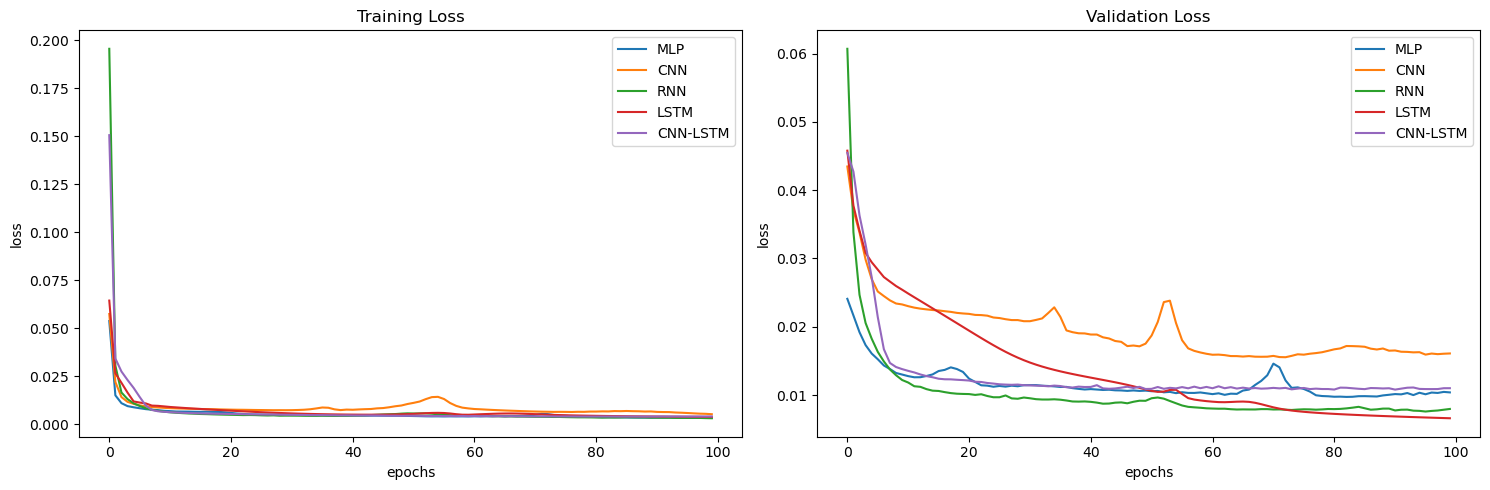

In [64]:
# trianing andd validation loss

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(hist_mlp.history['loss'], label='MLP')
ax1.plot(hist_cnn.history['loss'], label='CNN')
ax1.plot(hist_rnn.history['loss'], label='RNN')
ax1.plot(hist_lstm.history['loss'], label='LSTM')
ax1.plot(hist_cnn_lstm.history['loss'], label='CNN-LSTM')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend(loc='best')
ax1.set_title('Training Loss')

ax2.plot(hist_mlp.history['val_loss'], label='MLP')
ax2.plot(hist_cnn.history['val_loss'], label='CNN')
ax2.plot(hist_rnn.history['val_loss'], label='RNN')
ax2.plot(hist_lstm.history['val_loss'], label='LSTM')
ax2.plot(hist_cnn_lstm.history['val_loss'], label='CNN-LSTM')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend(loc='best')
ax2.set_title('Validation Loss')

fig.tight_layout()
plt.show()

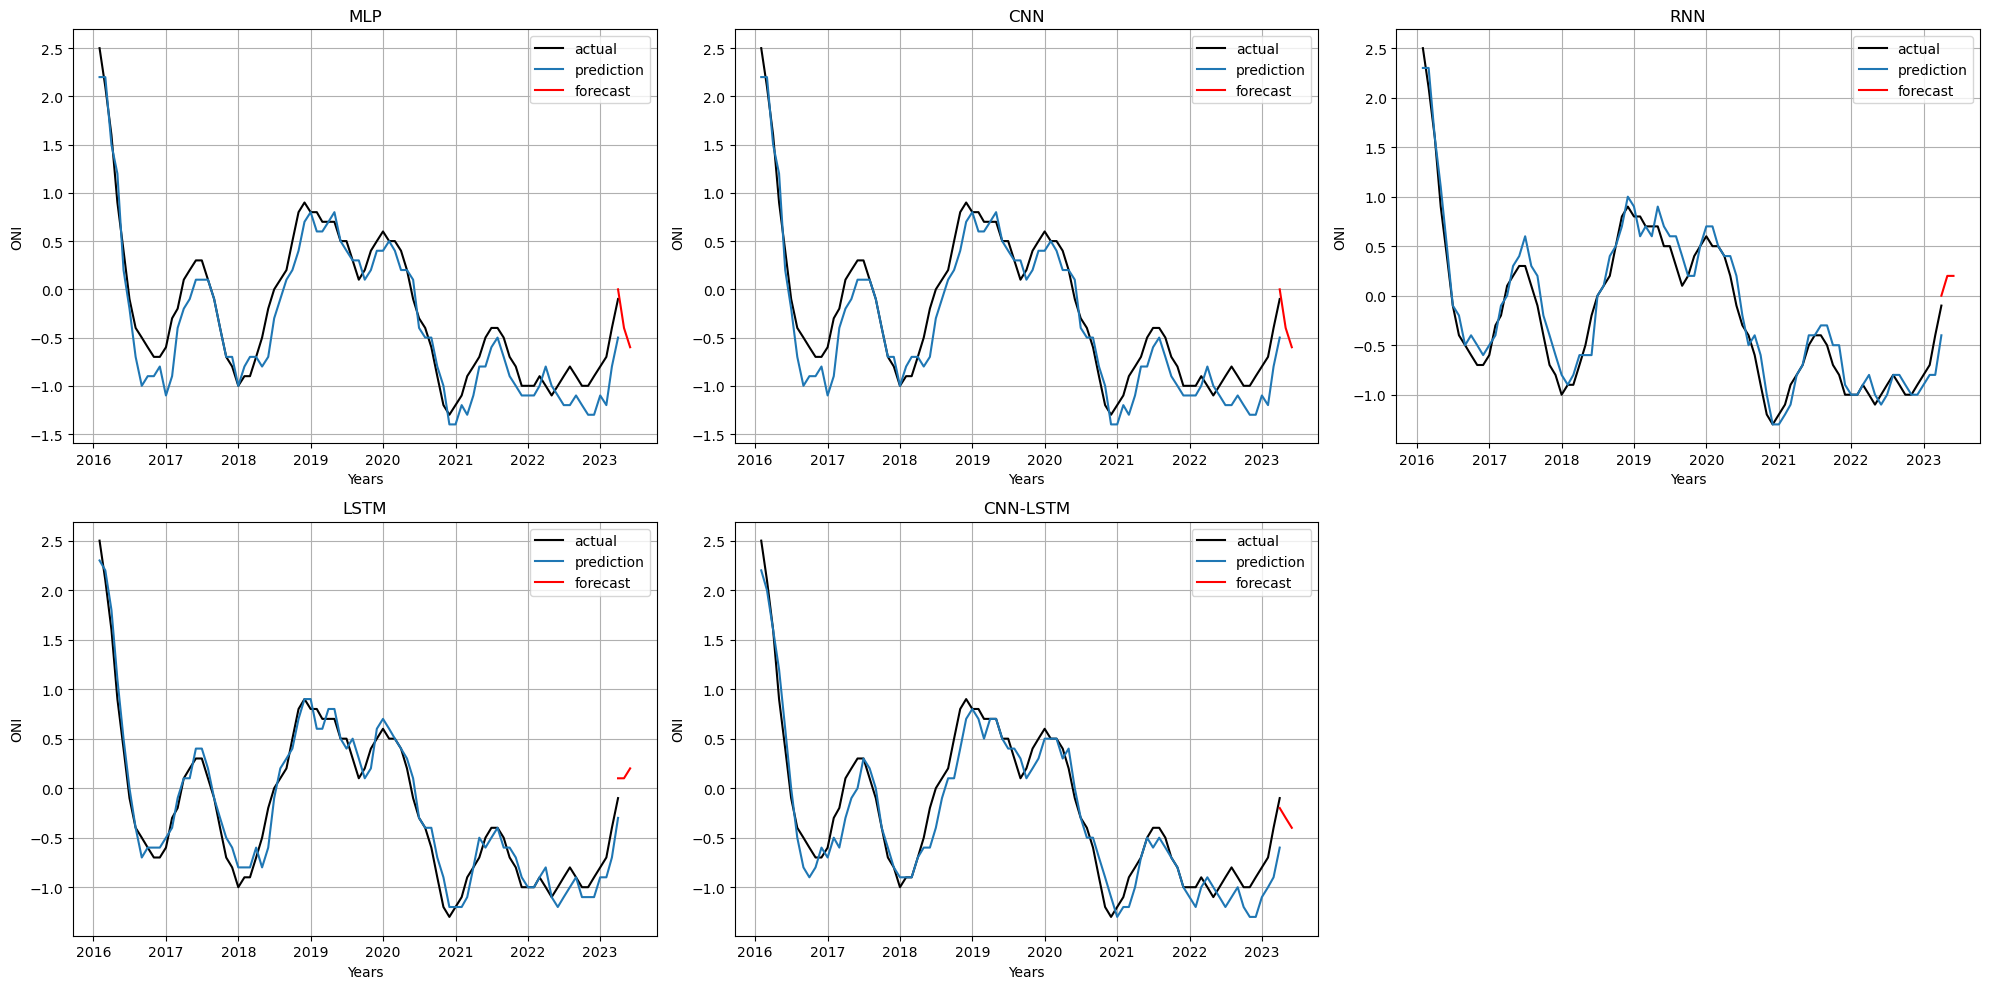

In [65]:
# plot results

# y_test has three columns:
# column 0 = oni values for next month
# column 1 = oni values for the second next month
# column 2 = oni values for the third next month

# plot the oni actual (y_test) and predicted (y_hat) values for the next month
# plot y_hat last row values as the forecast for the next 3 months


# find y_test start row index to get the start of the date range
# add 1 because the values are for the next month
y_start = n_train + n_valid + 1


# oni actual values
y_actual = pd.DataFrame(index = df_reframed.index[y_start:],
                        data = y_scaler.inverse_transform(y_test)[:-1, 0])

# oni predicted values
y_predict = pd.DataFrame(index = df_reframed.index[y_start:],
                         data = {'MLP': yhat_mlp[:-1, 0],
                                 'CNN': yhat_mlp[:-1, 0],
                                 'RNN': yhat_rnn[:-1, 0],
                                 'LSTM': yhat_lstm[:-1, 0],
                                 'CNN-LSTM': yhat_cnn_lstm[:-1, 0]
                                })

# oni forecast values
y_forecast = pd.DataFrame(index = pd.date_range(start=df_reframed.index[-1], 
                                                periods=n_out, freq= 'MS'),
                          data = {'MLP': yhat_mlp[-1, :],
                                  'CNN': yhat_mlp[-1, :],
                                  'RNN': yhat_rnn[-1, :],
                                  'LSTM': yhat_lstm[-1, :],
                                  'CNN-LSTM': yhat_cnn_lstm[-1, :]
                                 })


plt.figure(figsize=(20, 10))
for i, model in enumerate(models):
    plt.subplot(2, 3, i + 1)
    plt.plot(y_actual, label='actual', color='k')
    plt.plot(y_predict[model], label='prediction')
    plt.plot(y_forecast[model], label='forecast', color='r')
    plt.xlabel('Years')
    plt.ylabel('ONI')
    plt.legend(loc='upper right')
    plt.title(f'{model}')
    plt.grid()
plt.tight_layout()
plt.show()

### References
- Jason Brownlee, "How to Get Started with Deep Learning for Time Series Forecasting (7-Day Mini-Course)," Machine Learning Mastery, 2019, [Online]. Available: https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-time-series-forecasting-7-day-mini-course/
- Dimitri Oliveira, "Deep Learning for Time Series Forecasting," Kaggle, 2019, [Online]. Available: https://www.kaggle.com/code/dimitreoliveira/deep-learning-for-time-series-forecasting
- Shabana Mir. "Forecasting El Nino-Southern Oscillation (ENSO)", Kagle, 2023, [Online]. Available: https://www.kaggle.com/code/shabanamir/forecasting-el-nino-southern-oscillation-enso